# Agglomerative hierarchical clustering

In this technique, each data point is a cluster in the begginning. Then, join the two closest data points,
based on some distance, into one cluster. Run this process until one big cluster is formed. Then, 
divide the resulting hierarchical clustering into the desired number of clusters.

## Methodology

### Number of groups

Agglomerative clustering allows to define the number of groups at the end of the execution. This work will
consider $N \in \{2,3,\ldots,13\}$ groups. Since the algorithm is deterministic, only one executing per $N$
value will be performed.

### Davies-Bouldin (DB) index

Every clustering will then be evaluated in the view of the Davies-Bouldin (DB) index:

$$
R_{ij} = \frac{s_i + s_j}{d_{ij}}
$$

$$
D_i = \max_{j\neq i}R_{ij}
$$

$$
DB = \frac 1 k \sum_i D_i
$$

## Implementation

### Function to load the datasets

In [1]:
import pandas as pd

def load_dataset(paths):
    '''
    Load the datasets in paths.
    '''
    # load train and test datasets together
    dataset = pd.concat([pd.read_csv(f) for f in paths])
    # keep targets for future comparative purposes
    targets = dataset['cover_type']
    # remove target column
    dataset.drop('cover_type', inplace=True, axis=1)
    # check shape
    print("[INFO] Dataset shape: ", dataset.shape)
    # return
    return dataset

### Function to run the clustering

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

def perform_agg_clustering(dataset, cluster_sizes):
    '''
    Perform aggregation clustering.
    '''
    results = []
    models = {}
    for size in cluster_sizes:
        print("[INFO] Running for size", size)
        # train model
        cluster = AgglomerativeClustering(n_clusters=size, affinity='euclidean', linkage='ward')
        cluster.fit(dataset)
        # compute db
        db = davies_bouldin_score(dataset, cluster.labels_)
        # store result
        results.append([size, db])
        # store models
        models[size] = cluster
        print("[INFO] Done for size", size, "db =",db)
    return (models, pd.DataFrame(results, columns=['cluster_size','db_index']))

### Function to save models and results

In [3]:
from sklearn.externals import joblib

def save_models_results(results, models, save_model_path, save_results_path):
    '''
    Save clustering models and results.
    '''
    for size in models:
        joblib.dump(models[size], save_model_path + '_' + str(size)+'.save')
    results.to_csv(save_results_path, index=False)

### Function to perform the entire pipeline

In [4]:
def perform_and_save_agg(paths, cluster_sizes, save_model_path, save_results_path):
    '''
    Run clustering and save models and results.
    '''
    dataset = load_dataset(paths)
    models, df_results = perform_agg_clustering(dataset, cluster_sizes)
    save_models_results(df_results, models, save_model_path, save_results_path)
    return df_results

### Execute for the given datasets

In [15]:
sizes = list(range(2,51))
# original dataset
original_res = perform_and_save_agg(['../datasets/covertype_norm_train.csv', 
                      '../datasets/covertype_norm_test.csv'],
                    sizes, 
                    '../models/agg_clustering_original',
                    '../results/agg_clustering_original.csv')
# lda dataset
lda_res = perform_and_save_agg(['../datasets/covertype_lda_train.csv', 
                       '../datasets/covertype_lda_test.csv'],
                    sizes, 
                    '../models/agg_clustering_lda',
                    '../results/agg_clustering_lda.csv')

[INFO] Dataset shape:  (19229, 54)
[INFO] Running for size 2


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 2 db = 3.4226213775587677
[INFO] Running for size 3


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 3 db = 3.238645380202774
[INFO] Running for size 4


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 4 db = 2.456909058985807
[INFO] Running for size 5


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 5 db = 2.5524821747794584
[INFO] Running for size 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 6 db = 2.429564599862761
[INFO] Running for size 7


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 7 db = 2.560741249422169
[INFO] Running for size 8


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 8 db = 2.3604566544196164
[INFO] Running for size 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 9 db = 2.249828521073332
[INFO] Running for size 10


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 10 db = 2.1553742118284447
[INFO] Running for size 11


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 11 db = 1.9874864050896677
[INFO] Running for size 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 12 db = 1.9450688126840943
[INFO] Running for size 13


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 13 db = 1.8002724039489661
[INFO] Running for size 14


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 14 db = 1.7233564470940987
[INFO] Running for size 15


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 15 db = 1.6901637356304622
[INFO] Running for size 16


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 16 db = 1.654281661074965
[INFO] Running for size 17


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 17 db = 1.5772480485100342
[INFO] Running for size 18


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 18 db = 1.498193378700297
[INFO] Running for size 19


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 19 db = 1.4567461683376202
[INFO] Running for size 20


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 20 db = 1.3915097052655563
[INFO] Running for size 21


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 21 db = 1.3568152316967017
[INFO] Running for size 22


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 22 db = 1.334971173294644
[INFO] Running for size 23


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 23 db = 1.2711232743384895
[INFO] Running for size 24


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 24 db = 1.240864893586844
[INFO] Running for size 25


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 25 db = 1.1626824806331835
[INFO] Running for size 26


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 26 db = 1.130559030500852
[INFO] Running for size 27


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 27 db = 1.1013296273722115
[INFO] Running for size 28


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 28 db = 1.0660358840695807
[INFO] Running for size 29


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 29 db = 1.0425664503555139
[INFO] Running for size 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 30 db = 1.0089002255288542
[INFO] Running for size 31


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 31 db = 0.9810931819688189
[INFO] Running for size 32


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 32 db = 0.983937393701052
[INFO] Running for size 33


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 33 db = 0.9276818435277315
[INFO] Running for size 34


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 34 db = 0.9030944140281785
[INFO] Running for size 35


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 35 db = 0.7978981926894056
[INFO] Running for size 36


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 36 db = 0.7771139617803374
[INFO] Running for size 37


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 37 db = 0.7570587613763028
[INFO] Running for size 38


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 38 db = 0.7136606627263201
[INFO] Running for size 39


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 39 db = 0.7365692685237462
[INFO] Running for size 40


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 40 db = 0.7405427613553291
[INFO] Running for size 41


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 41 db = 0.7431822187454623
[INFO] Running for size 42


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 42 db = 0.7591103594427002
[INFO] Running for size 43


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 43 db = 0.814847421699052
[INFO] Running for size 44


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 44 db = 0.8316191385205722
[INFO] Running for size 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 45 db = 0.8471898120358873
[INFO] Running for size 46


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 46 db = 0.8682269325612625
[INFO] Running for size 47


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 47 db = 0.8784962179998926
[INFO] Running for size 48


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 48 db = 0.8811421253225865
[INFO] Running for size 49


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 49 db = 0.8829691168621021
[INFO] Running for size 50


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 50 db = 0.8912719744407391
[INFO] Dataset shape:  (19229, 6)
[INFO] Running for size 2


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 2 db = 0.9955151704834501
[INFO] Running for size 3


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 3 db = 0.8333330614852276
[INFO] Running for size 4


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 4 db = 0.8260237098568517
[INFO] Running for size 5


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 5 db = 0.9739859757312898
[INFO] Running for size 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 6 db = 1.1308102678148833
[INFO] Running for size 7


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 7 db = 0.9883020528513197
[INFO] Running for size 8


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 8 db = 0.9761229121299866
[INFO] Running for size 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 9 db = 1.0894115575150776
[INFO] Running for size 10


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 10 db = 1.0942748583266986
[INFO] Running for size 11


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 11 db = 1.0608513521320069
[INFO] Running for size 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 12 db = 0.9836816197634636
[INFO] Running for size 13


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 13 db = 0.9928510917111524
[INFO] Running for size 14


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 14 db = 1.0660150132141755
[INFO] Running for size 15


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 15 db = 1.0838783920083215
[INFO] Running for size 16


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 16 db = 1.105023422579106
[INFO] Running for size 17


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 17 db = 1.1073337630615252
[INFO] Running for size 18


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 18 db = 1.1190182521610548
[INFO] Running for size 19


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 19 db = 1.1368109898685355
[INFO] Running for size 20


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 20 db = 1.1547600163924663
[INFO] Running for size 21


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 21 db = 1.165624645314912
[INFO] Running for size 22


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 22 db = 1.1890023213153293
[INFO] Running for size 23


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 23 db = 1.2873425636715545
[INFO] Running for size 24


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 24 db = 1.2815427669051507
[INFO] Running for size 25


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 25 db = 1.3043328366978981
[INFO] Running for size 26


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 26 db = 1.2714337161888283
[INFO] Running for size 27


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 27 db = 1.2786064981924612
[INFO] Running for size 28


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 28 db = 1.2806130544230894
[INFO] Running for size 29


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 29 db = 1.2965756532559345
[INFO] Running for size 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 30 db = 1.3208086678889965
[INFO] Running for size 31


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 31 db = 1.3026069580277793
[INFO] Running for size 32


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 32 db = 1.2935408259982473
[INFO] Running for size 33


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 33 db = 1.2956234738153005
[INFO] Running for size 34


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 34 db = 1.3096913981419
[INFO] Running for size 35


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 35 db = 1.3312106975591513
[INFO] Running for size 36


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 36 db = 1.3166505894223484
[INFO] Running for size 37


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 37 db = 1.288823565795953
[INFO] Running for size 38


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 38 db = 1.296521813582778
[INFO] Running for size 39


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 39 db = 1.2858342416313946
[INFO] Running for size 40


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 40 db = 1.298288820887418
[INFO] Running for size 41


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 41 db = 1.3082203502593217
[INFO] Running for size 42


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 42 db = 1.3132610911973799
[INFO] Running for size 43


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 43 db = 1.3043655490899346
[INFO] Running for size 44


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 44 db = 1.3198404544155793
[INFO] Running for size 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 45 db = 1.3098422045477478
[INFO] Running for size 46


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 46 db = 1.299567535866256
[INFO] Running for size 47


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 47 db = 1.2888029976530428
[INFO] Running for size 48


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 48 db = 1.2806548134132327
[INFO] Running for size 49


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[INFO] Done for size 49 db = 1.2816478531671809
[INFO] Running for size 50
[INFO] Done for size 50 db = 1.2726886477969352


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


## Results

Results are expressed in terms of the DB index:

### Original

In [16]:
original_res

,cluster_size,db_index
0,2,3.422621
1,3,3.238645
2,4,2.456909
3,5,2.552482
4,6,2.429565
5,7,2.560741
6,8,2.360457
7,9,2.249829
8,10,2.155374
9,11,1.987486


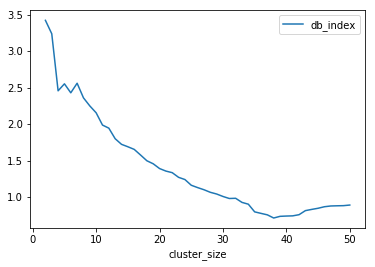

In [17]:
original_res.plot.line(x='cluster_size', y='db_index')

### LDA

In [18]:
lda_res

,cluster_size,db_index
0,2,0.995515
1,3,0.833333
2,4,0.826024
3,5,0.973986
4,6,1.130810
5,7,0.988302
6,8,0.976123
7,9,1.089412
8,10,1.094275
9,11,1.060851


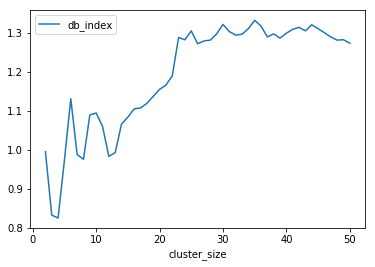

In [19]:
lda_res.plot.line(x='cluster_size', y='db_index')